In [0]:
from collections import defaultdict
import itertools
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, math

In [0]:
# load data from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# # cd into dataset dir
# %cd /content/drive/My Drive/Colab Notebooks/_datasets/DA/
# !ls

In [3]:
A = np.load('distmat', allow_pickle=True)

items = [0,5,7,3,8]
print(items[1:])

A = A[items, :][:, items]
print(A.shape)
A

[5, 7, 3, 8]
(5, 5)


array([[   0, 1456, 1698, 1225, 1821],
       [1456,    0,  252,  252,  378],
       [1698,  252,    0,  504,  126],
       [1225,  252,  504,    0,  630],
       [1821,  378,  126,  630,    0]])

### Brute Force

* 4 items to collect: 5,7,3,8
* possible orders of collection: 24 (4!)
* Start and Finsish of tour:  vertex 0

In [11]:
print(math.factorial(4))

mapping = dict({0:0, 1:5, 2:7, 3:3, 4:8})
# print(mapping.keys())
# print(mapping[3])

paths = list(itertools.permutations(range(1,5)))
mapped_paths = [[mapping[item] for item in path] for path in paths]
print(type(paths))
print(type(mapped_paths))


def find_best(paths, mapped_paths):
  min_dist = 10000
  min_dist_paths = {}
  for path, mapped_path in zip(paths, mapped_paths):
    dist = 0
    dist_ls = []
    for i in range(len(path)):
      if i == 0:
        dist += A[0, path[i]]
        dist_ls.append(A[0, path[i]])
      try:
        dist += A[path[i], path[i+1]]
        dist_ls.append(A[path[i], path[i+1]])
      except:
        dist += A[path[i], 0]
        dist_ls.append(A[path[i], 0])
        
    print(mapped_path, dist, dist_ls)
    
    if dist < min_dist:
      min_dist = dist
    min_dist_paths[tuple(mapped_path)] = dist
  return min_dist_paths, min_dist
  
  
#   print(f'dist from 0 to {mapping[first]} in path {mapped_path}: {dist}')

res, min_dist = find_best(paths, mapped_paths)
[[dist, path] for path, dist in res.items() if dist == min_dist]

  
# print(f'min_dist: {min_dist}')
# [print(p) for p in min_dist_paths]

24
<class 'list'>
<class 'list'>
[5, 7, 3, 8] 4663 [1456, 252, 504, 630, 1821]
[5, 7, 8, 3] 3689 [1456, 252, 126, 630, 1225]
[5, 3, 7, 8] 4159 [1456, 252, 504, 126, 1821]
[5, 3, 8, 7] 4162 [1456, 252, 630, 126, 1698]
[5, 8, 7, 3] 3689 [1456, 378, 126, 504, 1225]
[5, 8, 3, 7] 4666 [1456, 378, 630, 504, 1698]
[7, 5, 3, 8] 4653 [1698, 252, 252, 630, 1821]
[7, 5, 8, 3] 4183 [1698, 252, 378, 630, 1225]
[7, 3, 5, 8] 4653 [1698, 504, 252, 378, 1821]
[7, 3, 8, 5] 4666 [1698, 504, 630, 378, 1456]
[7, 8, 5, 3] 3679 [1698, 126, 378, 252, 1225]
[7, 8, 3, 5] 4162 [1698, 126, 630, 252, 1456]
[3, 5, 7, 8] 3676 [1225, 252, 252, 126, 1821]
[3, 5, 8, 7] 3679 [1225, 252, 378, 126, 1698]
[3, 7, 5, 8] 4180 [1225, 504, 252, 378, 1821]
[3, 7, 8, 5] 3689 [1225, 504, 126, 378, 1456]
[3, 8, 5, 7] 4183 [1225, 630, 378, 252, 1698]
[3, 8, 7, 5] 3689 [1225, 630, 126, 252, 1456]
[8, 5, 7, 3] 4180 [1821, 378, 252, 504, 1225]
[8, 5, 3, 7] 4653 [1821, 378, 252, 504, 1698]
[8, 7, 5, 3] 3676 [1821, 126, 252, 252, 1225]
[

[[3676, (3, 5, 7, 8)], [3676, (8, 7, 5, 3)]]

In [26]:
# check dist for DA solution
print(f'dist for DA solution: {res[8, 3, 5, 7]}')

dist for DA solution: 4653


In [13]:
G = nx.convert_matrix.from_numpy_matrix(A)
print(len(G.nodes()))
print(len(G.edges()))
print(nx.is_weighted(G))
print(G.get_edge_data(0,0))
print(G.get_edge_data(0,1))
print(G.get_edge_data(1,5))
nx.is_connected(G)
G.edges()

5
10
True
None
{'weight': 1456}
None


EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

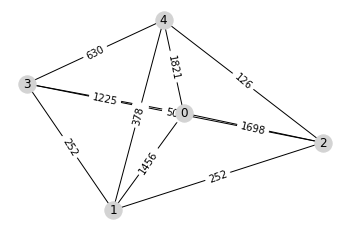

In [14]:
plt.figure() #figsize=(15,10)
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, with_labels = True, node_color='lightgrey') #, node_size=5
plt.show()

### Approximation Algorithm

```
MST <- minimum spanning tree of G
D <- MST with each edges doubled
find an eulerian cycle C in D
return a cycle that visits vertices in the order of their appearance in C
```

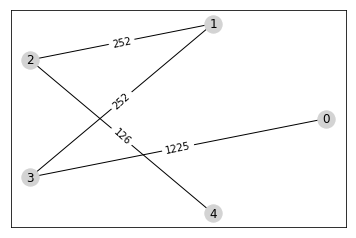

In [15]:
# MST <- minimum spanning tree of G

MST = nx.minimum_spanning_tree(G, weight='weight')
# print(list(MST))

plt.figure() #figsize=(15,10)
pos = nx.circular_layout(G) 
labels = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx(MST, pos, with_labels=True, node_color='lightgrey') #figsize=(15,10)
plt.show()

[(0, 3), (3, 0), (3, 1), (1, 2), (1, 3), (2, 4), (2, 1), (4, 2)]


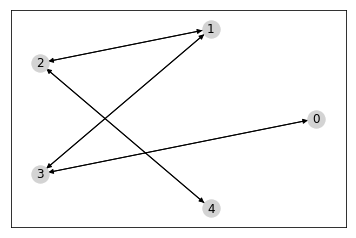

In [16]:
# D <- MST with each edges doubled

mst_edges = MST.edges()
D = nx.MultiDiGraph()
D.add_edges_from([(e[0], e[1]) for e in mst_edges])
D.add_edges_from([(e[1], e[0]) for e in mst_edges])
print(D.edges())

plt.figure() # figsize=(15,10)
pos = nx.circular_layout(G) 
nx.draw_networkx(D, pos, node_color='lightgrey')
plt.show()

optimal path approx.: [0, 3, 5, 7, 8]


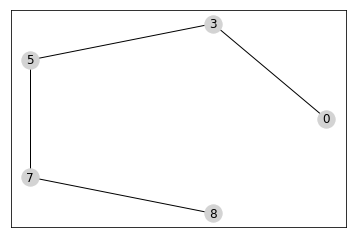

In [28]:
# find an eulerian cycle C in D

C = nx.eulerian_circuit(D)
C_edges = list(C)
# print(C_edges)

# return a cycle that visits vertices in the order of their appearance in C
visited = defaultdict(int)
[visited[i[0]] for i in C_edges]
# print(visited)

path = []
for edge in C_edges:
  u = edge[0]
  v = edge[1]
  if visited[u]==0:
    path.append(u)
    visited[u]=1
  if visited[v]==0:
    path.append(v)
    visited[v]=1
len(path)
res = list(map(mapping.get, path))
print(f'optimal path approx.: {res}')


TSP = nx.Graph()
TSP.add_path(path)
nx.relabel_nodes(TSP, mapping, copy=False)

plt.figure()
pos = nx.circular_layout(TSP) 
labels = nx.get_edge_attributes(TSP,'weight')
nx.draw_networkx_edge_labels(TSP, pos,edge_labels=labels)
nx.draw_networkx(TSP, pos, with_labels=True, node_color='lightgrey') #, node_size=5
plt.show()